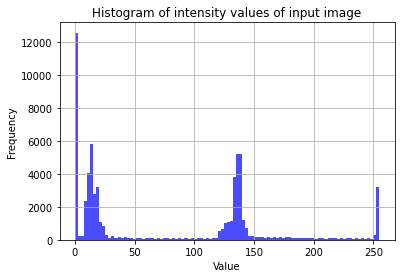

3.4028234663852886e+38


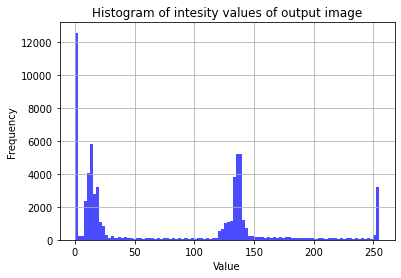

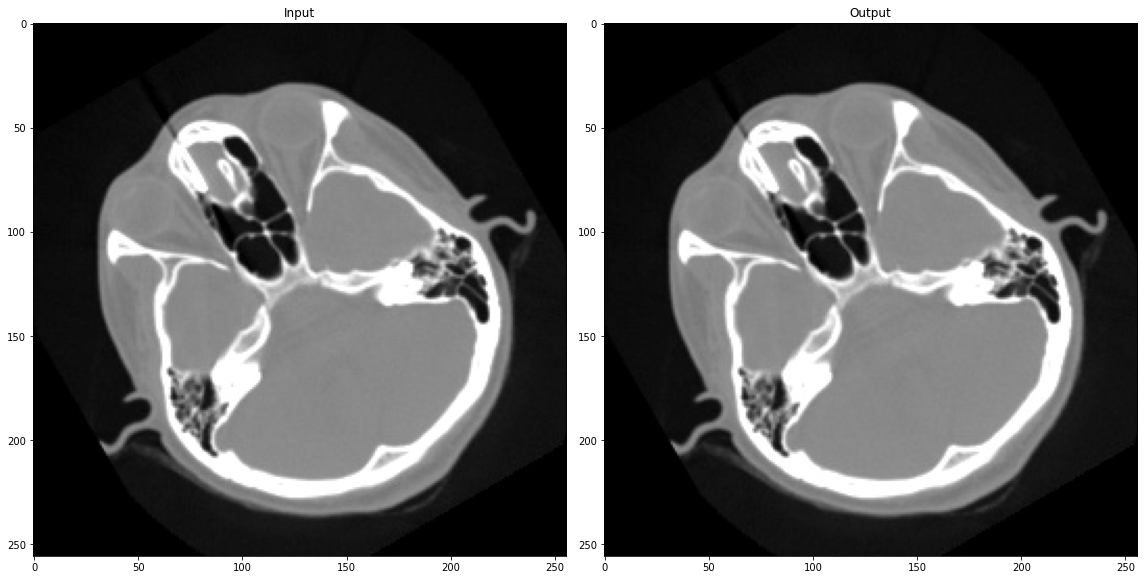

In [3]:
import itk
from itkwidgets import view
import numpy as np
import matplotlib.pyplot as plt

input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2

InputPixelType = itk.F
OutputPixelType = itk.UC

InputImageType = itk.Image[InputPixelType, Dimension]
OutputImageType = itk.Image[OutputPixelType, Dimension]

reader = itk.ImageFileReader[InputImageType].New()
reader.SetFileName(input_image_path)

inputIm = reader.GetOutput()
inputnp = np.array(inputIm)

# Flatten the 2D array to a 1D array
flattened_data = inputnp.ravel()

# Create a histogram
plt.hist(flattened_data, bins=100, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of intensity values of input image')
plt.grid(True)

# Show the histogram
plt.show()

print(itk.NumericTraits[InputPixelType].max())

rescaler = itk.RescaleIntensityImageFilter[InputImageType, InputImageType].New()
rescaler.SetInput(inputIm)
rescaler.SetOutputMinimum(0)
outputPixelTypeMaximum = itk.NumericTraits[OutputPixelType].max()
rescaler.SetOutputMaximum(outputPixelTypeMaximum)

rescl = rescaler.GetOutput()

castImageFilter = itk.CastImageFilter[InputImageType, OutputImageType].New()
castImageFilter.SetInput(rescl)
castImageFilter.Update()

# print(img.shape)
img = castImageFilter.GetOutput()


outputnp = np.array(img)

# Flatten the 2D array to a 1D array
flattened_data = outputnp.ravel()

# Create a histogram
plt.hist(flattened_data, bins=100, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of intesity values of output image')
plt.grid(True)

# Show the histogram
plt.show()

# viewer =  view(img, gradient_opacity=0.5)
# viewer.cmap = ['Grayscale',]
# viewer

fig, axes = plt.subplots(1, 2, figsize=(16, 16))

axes[0].imshow(inputIm,cmap="gray")
axes[0].set_title('Input')

axes[1].imshow(img,cmap="gray")
axes[1].set_title('Output')


plt.tight_layout()
plt.show()

In [4]:
itk.ImageAdaptor

AttributeError: module 'itk' has no attribute 'ImageAdaptor'